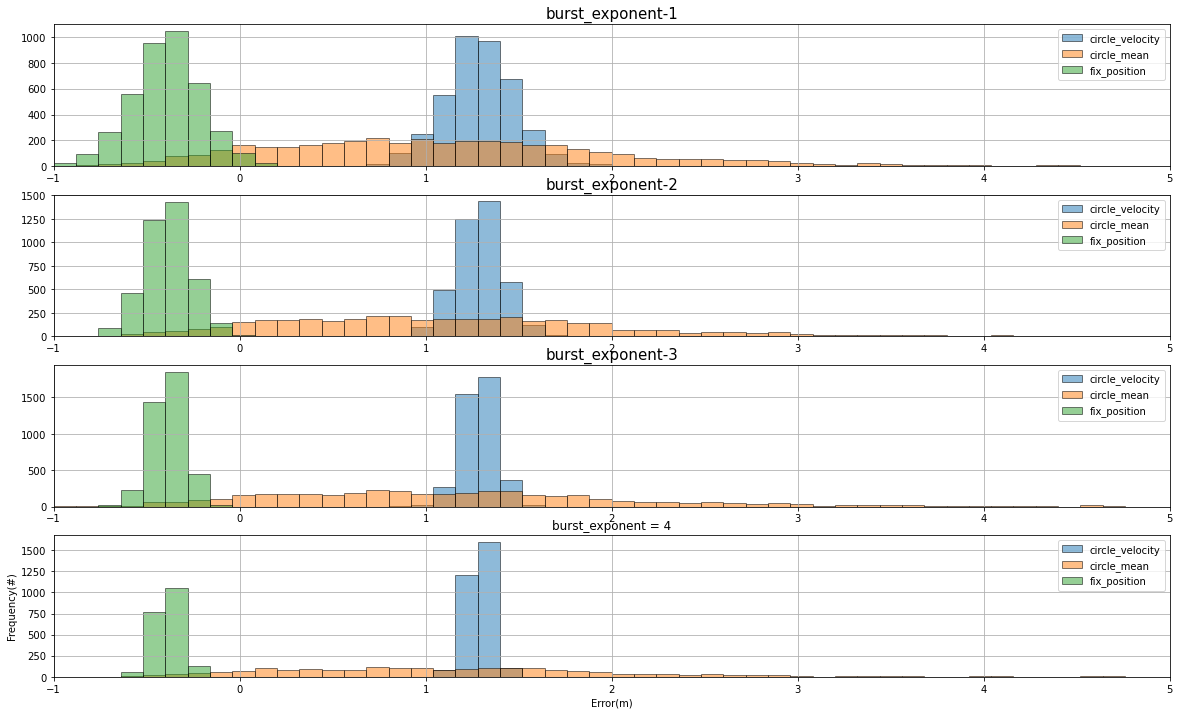

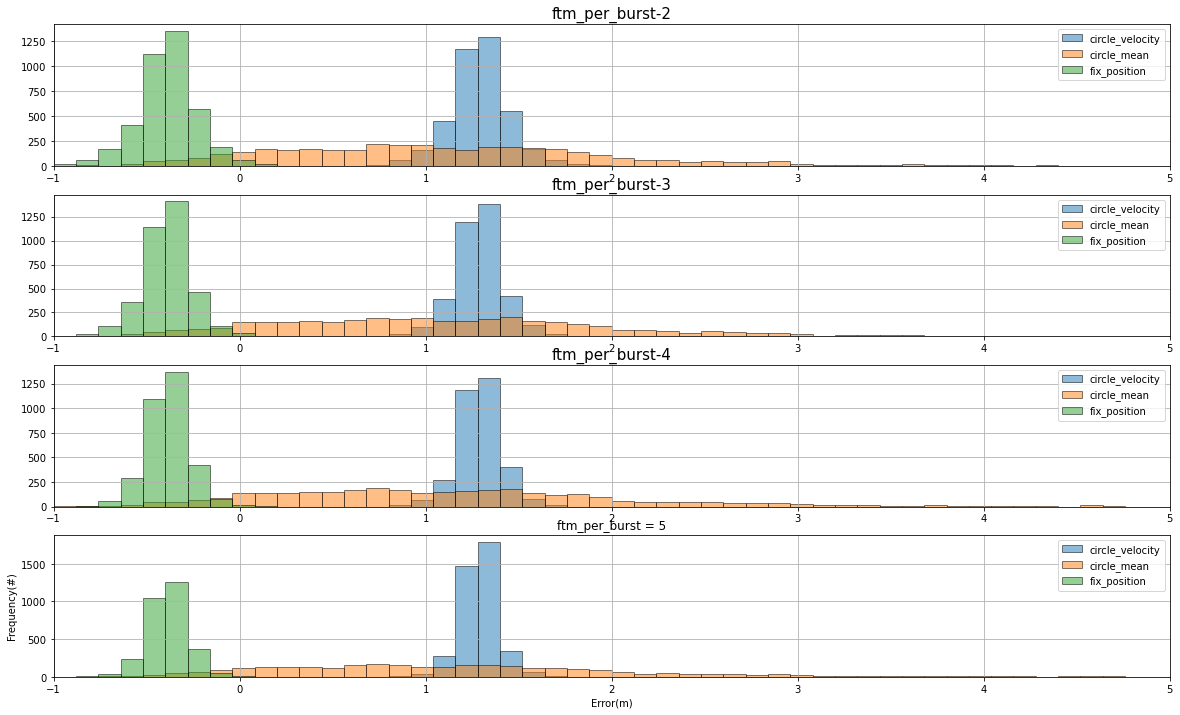

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/alonso/Documents/uni/adapting-ftm-trigger-algorithm/ns-allinone-3.33-FTM-SigStr/ns-3.33/ftm_ranging/simulations/data/data.csv')

path = './data/parameter_study/'
sampled_distance = 10

parameters = ['burst_exponent', 'ftm_per_burst']
for parameter in parameters:
    fig, axes = plt.subplots(4, figsize = (20, 12)) # syntax is plt.subplots(nrows, ncols, figsize=(width, height))
    ax = axes.ravel()
    values = df[parameter].unique()
    values.sort()
    counter = 0
    for value in values:
        simulation_types = df['meassurement_type'].unique()
        for simulation_type in simulation_types:
            if parameter == 'ftm_per_burst':
                hist = df.loc[(df.ftm_per_burst == value) & (df.meassurement_type == simulation_type) &(df.real_distance == sampled_distance)]
                hist['error'].hist(range=[-1,5], edgecolor='black', grid=True, ax = ax[counter], label=simulation_type, bins=50, alpha=0.5)

            elif parameter == 'burst_exponent':
                hist = df.loc[(df.burst_exponent == value) & (df.meassurement_type == simulation_type) & (df.real_distance == sampled_distance)]
                hist['error'].hist(range=[-1,5], edgecolor='black', grid=True, ax = ax[counter], label=simulation_type, bins=50, alpha=0.5)
            
            ax[counter].legend()
            ax[counter].set_xlim(-1, 5)
            ax[counter].set_title(parameter + "-" + str(value), fontsize = 15)
            ax[counter].tick_params(axis='both', which='minor', labelsize=14)
            ax[counter].tick_params(axis='both', which='minor', labelsize=14)    
            

        plt.title(parameter + " = " + str(value))
        plt.xlabel('Error(m)')
        plt.ylabel("Frequency(#)")
        #plt.savefig(path + parameter + "-" + str(value) + ".pdf")    
        counter = counter + 1
        
            
                
    